# Business Objective
The market research team at AdRight collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store during the prior three months. This Project will identify the profile of the typical customer for each treadmill product line (TM195, TM498, and TM798) offered by CardioGood Fitness. It will investigate potential differences across the product lines with respect to customer characteristics.

In [1]:
# Load the standard libraries to read, create and manipulate data set
import numpy as np
import pandas as pd
# Load the standard libraries to visualize data set
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the cardio data set into a pandas dataframe
cardio_data = pd.read_csv('./dataset/CardioGoodFitness.csv')
# Display the first 5 rows of the dataframe
cardio_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# General Knowledge
Treadmills are popular exercise equipment that can be used by a wide range of individuals across various demographics. The type of users who generally use treadmills can vary based on factors such as age, gender, education, marital status, and income. However, it's important to note that these characteristics may not strictly determine treadmill usage, as people from diverse backgrounds can all benefit from treadmill workouts. Here's a general overview of the types of users:

Age: Treadmills can be used by people of all age groups. While younger individuals might use treadmills for intense cardio workouts and weight management, older adults might utilize them for low-impact walking or gentle jogging to maintain mobility and cardiovascular health.

Gender: Treadmills are used by both men and women. There is no strict gender divide when it comes to treadmill usage, as both genders can benefit from cardiovascular exercise and weight management.

Education: Treadmill users can come from various educational backgrounds. Education level might not be a significant factor in determining treadmill usage, as individuals from different educational backgrounds can all appreciate the convenience and health benefits of treadmill workouts.

Marital Status: Treadmill usage is not determined by marital status. Both single individuals and those who are married can find value in using treadmills to stay active and healthy.

Income: Treadmill users can span a wide range of income levels. While higher-income individuals might be more likely to afford a treadmill for home use, people with lower incomes might use treadmills at gyms, fitness centers, or community facilities.

Given that our business objective is to identify user profiles for each tradmill product. Let us understand how many differnt tradmill products are there and how is their distribution

In [ ]:
# Let us first look at what all data types are present in the dataset
cardio_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

# Description of the columns
The columns of dataset are:

Product - product purchased, TM195 (Product Code)

Gender - Male or Female

Age - in years

Education - in years

MaritalStatus - relationship status, single or partnered

Usage - average number of times the customer plans to use the treadmill each week

Fitness - self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape

Income - annual household income ($)

Miles - average number of miles the customer expects to walk/run each week

In [21]:
# Let us use the value_counts() method to get the count of each product-id
# The value_counts() method returns a Series object
# The Series object is a one-dimensional array with axis labels
# The Series object has an index and a value
# The index is the product-id and the value is the count of the product-id
cardio_data['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

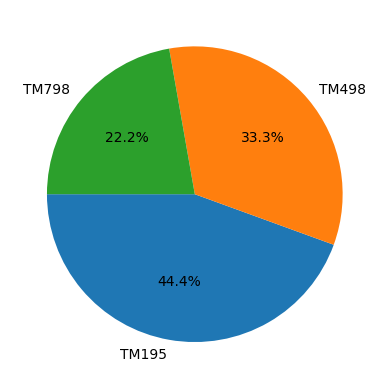

In [33]:
# Draw the pie chart for the Product column
plt.pie(cardio_data['Product'].value_counts(), labels=cardio_data['Product'].value_counts().index, autopct='%1.1f%%', startangle=180);

In [43]:
# Let us look at the descriptive statistics of the data
# We will use the describe() function to get the descriptive statistics
# We will use the transpose() function to get the statistics in a columnar format
# We will use the round() function to round the statistics to 2 decimal places
cardio_data.describe(include='all').transpose().round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


# Initial Observation
Total records in the dataset : 180

Going by the mean column: A user with an age around 29 years and 15 years of education, with an income of 53K$ will use the tradmill 3 times a week and covers 103 miles.
The mean of age is approx. 29 which is greater than the median(50%) which is 26. This indicates that the distribution is right skewed. The inter quartile range (Q3 - Q1) = 75% - 25% = 33 - 24 = 9. About 90% of the people's age is within the range of 33 to 24.



In [ ]:
# Let us explore each of the variables in the dataset
# Let us start with the age variable
# What all ages are present in the dataset
age_distribution = cardio_data['Age'].value_counts()
# Print the age distribution with more than 5 counts
print(age_distribution[age_distribution > 5])

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
Name: count, dtype: int64


Looks like majority of the people using the Tradmill are in the age range of 23-28. 
Given that the minimum age is 18. The expected histogram plot with Age data shall be right skewed. Let us plot and verify the same.

<Axes: xlabel='Age', ylabel='Count'>

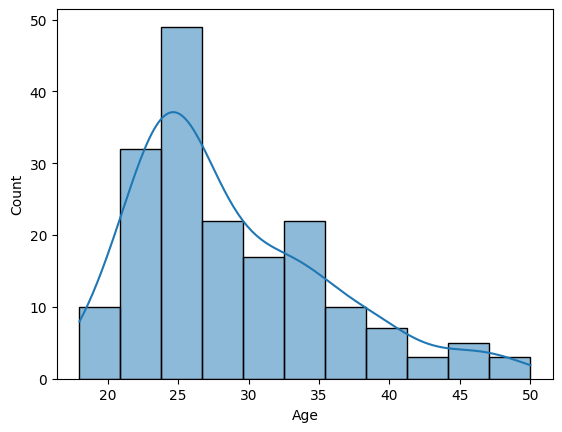

In [ ]:
# Using sns library to plot histogram of Age column with kde and observe the distribution
sns.histplot(x='Age', data=cardio_data, kde=True)

The kde curve shows distribution is right-skewed. The bars on the right side of the curve shows up-down trend due to the bin width size. From our previous observation we know that the majority group using the tradmill range is 23 to 28. Let us keep the bin width to 5 units and re-plot the graph and observe the bars.

<Axes: xlabel='Age', ylabel='Count'>

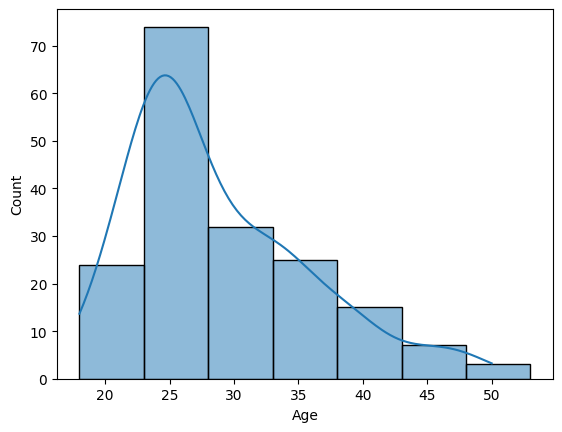

In [ ]:
sns.histplot(x='Age', data=cardio_data, kde=True, binwidth=5)

Let us try to understand if there is a relation between the Product and the age.
What proudct is generally preferred by which age group?
To get our answer, we must group by Product and look at the age distribution under each group. The best plot we can use for this is box plot.

<Axes: xlabel='Product', ylabel='Age'>

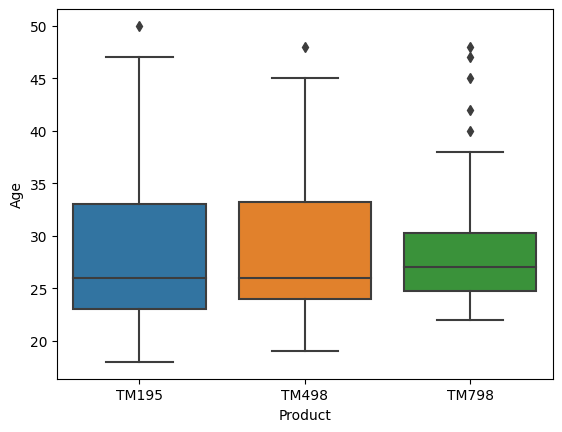

In [22]:
# Using sns draw a box plot group by Product and count by Age
sns.boxplot(x='Product', y='Age', data=cardio_data)

Looking at the median line in the box plots, we can say that the products TM195 and TM498 are the best selling ones in the age groups from 23 to 33. And the TM798 is also purchased within this age group but looks like this one is a preferred choice by the old people. Let us examine how many people above 33 are purchasing TM798

<Axes: xlabel='Product', ylabel='count'>

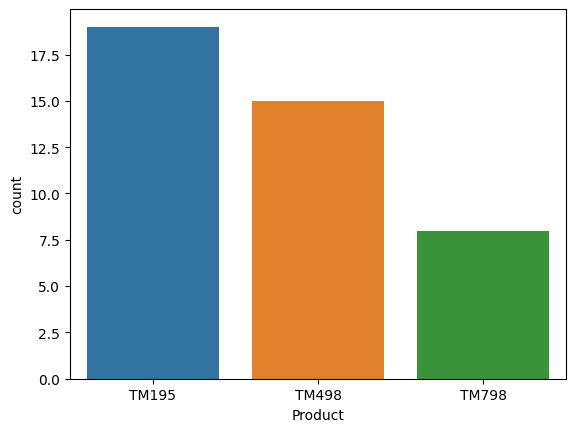

In [26]:
# filter all the rows where age is greater than 33
df_above_33_age = cardio_data[cardio_data['Age'] > 33]
# using sns plot the countplot for Product
sns.countplot(x='Product', data=df_above_33_age)

Looks like Age is not playing any major role in the choice of Product type. There is a general trend that the choice order is
TM195 > TM498 > TM798

<Axes: xlabel='Product', ylabel='Education'>

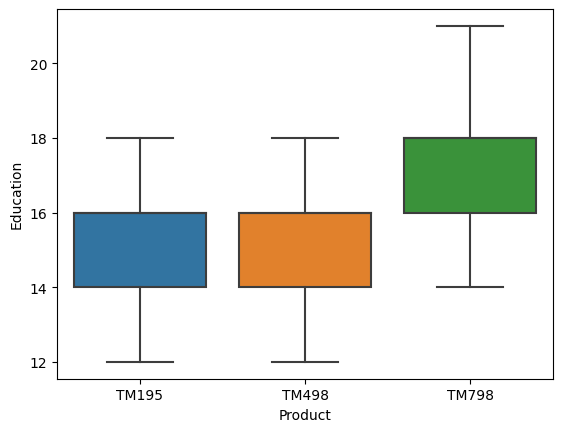

In [34]:
# Let us plot the box plot group by Product on x and and education on y
sns.boxplot(x='Product', y='Education', data=cardio_data)

Observation: Education has an influence over the choice of product. People with more years of education are likely to prefer TM798. And the choice of TM195 and TM498 is equally likely and not a preferred choice for the age above 18.

Let us try to plot the relation between Product and Income. Going by the observation so far, old people tend to prefer TM798 more. And it is a fact that as people grow old, their income is expected to be increasing. Therefore more income group people must be purchasing TM798. And may be we can deduct another hypothesis that TM798 is the costliest one.

<Axes: xlabel='Product', ylabel='Income'>

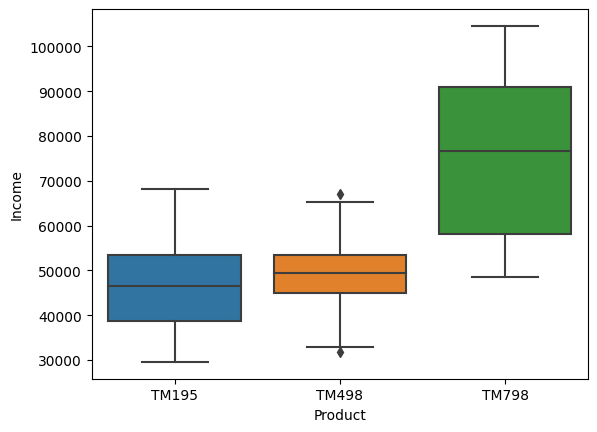

In [35]:
# Let us plot the box plot group by Product on x and and Income on y
sns.boxplot(x='Product', y='Income', data=cardio_data)

Now let us look at the usage of the Tradmill. As we can imagine with a greater price, we get superior quality and the usage also shall be good.
So, the usage of TM798 shall be greater compare to TM195 and TM498

<Axes: xlabel='Product', ylabel='Usage'>

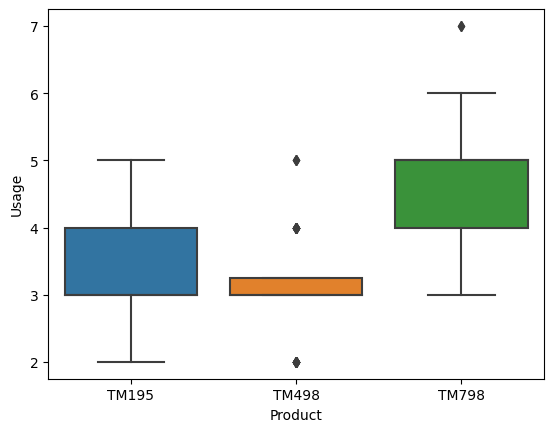

In [36]:
# Let us plot the box plot group by Product on x and and Income on y
sns.boxplot(x='Product', y='Usage', data=cardio_data)

Looks like the TM498 product usage is bad compare to the rest of two. Therefore we can deduce that TM498 may be cheapest with least quality

If the usage is good then the number of miles covered also is expected to be more.
Miles on TM798 > TM195 > TM195

<Axes: xlabel='Product', ylabel='Miles'>

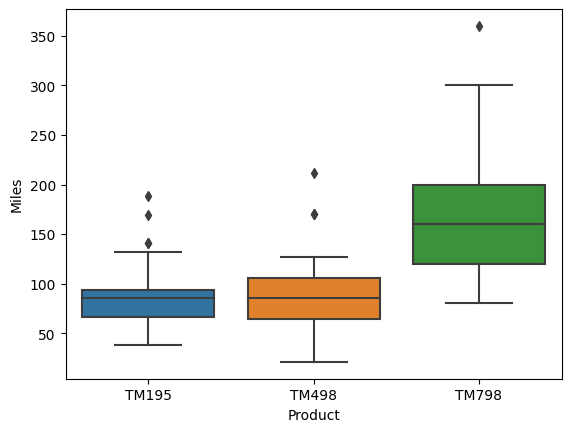

In [37]:
# Let us plot the box plot group by Product on x and and Miles on y
sns.boxplot(x='Product', y='Miles', data=cardio_data)

<Axes: xlabel='Product', ylabel='count'>

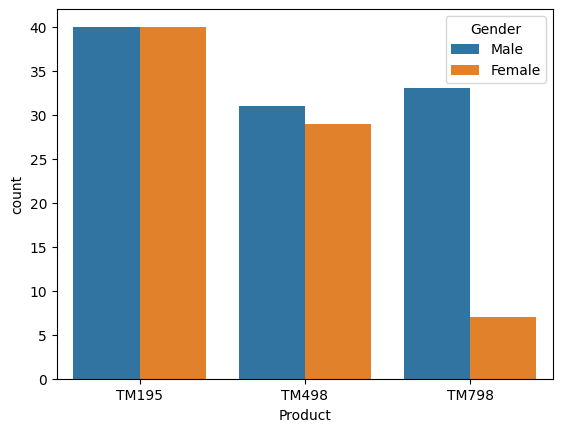

In [41]:
# Use sns and draw count plot for Gender across differnt Product categories
sns.countplot(data=cardio_data, x='Product', hue='Gender')

Looks like the gender influence only exist in TM798. For TM195 and TM498, gender influence is neutral. We can deduce that TM195 and TM498 are unisex versions and TM798 is suggested for Male

<Axes: xlabel='Product', ylabel='count'>

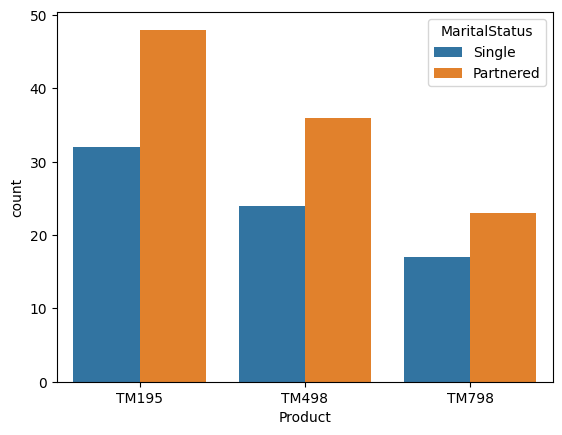

In [42]:
# Use sns and draw count plot for MaritalStatus across differnt Product categories
sns.countplot(data=cardio_data, x='Product', hue='MaritalStatus')

Looks like Partnered individuals prefer to buy Tradmill more when compared to the Single status ones.

# Conclusion
Product Profiles:

TM195 : Unisex, low budget, poor quality

TM498 : Unisex, medium budget, moderate quality

TM798: Male, high budget, high quality

/Users/irfanbashasheik/me/projects/data-science-practice/.conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


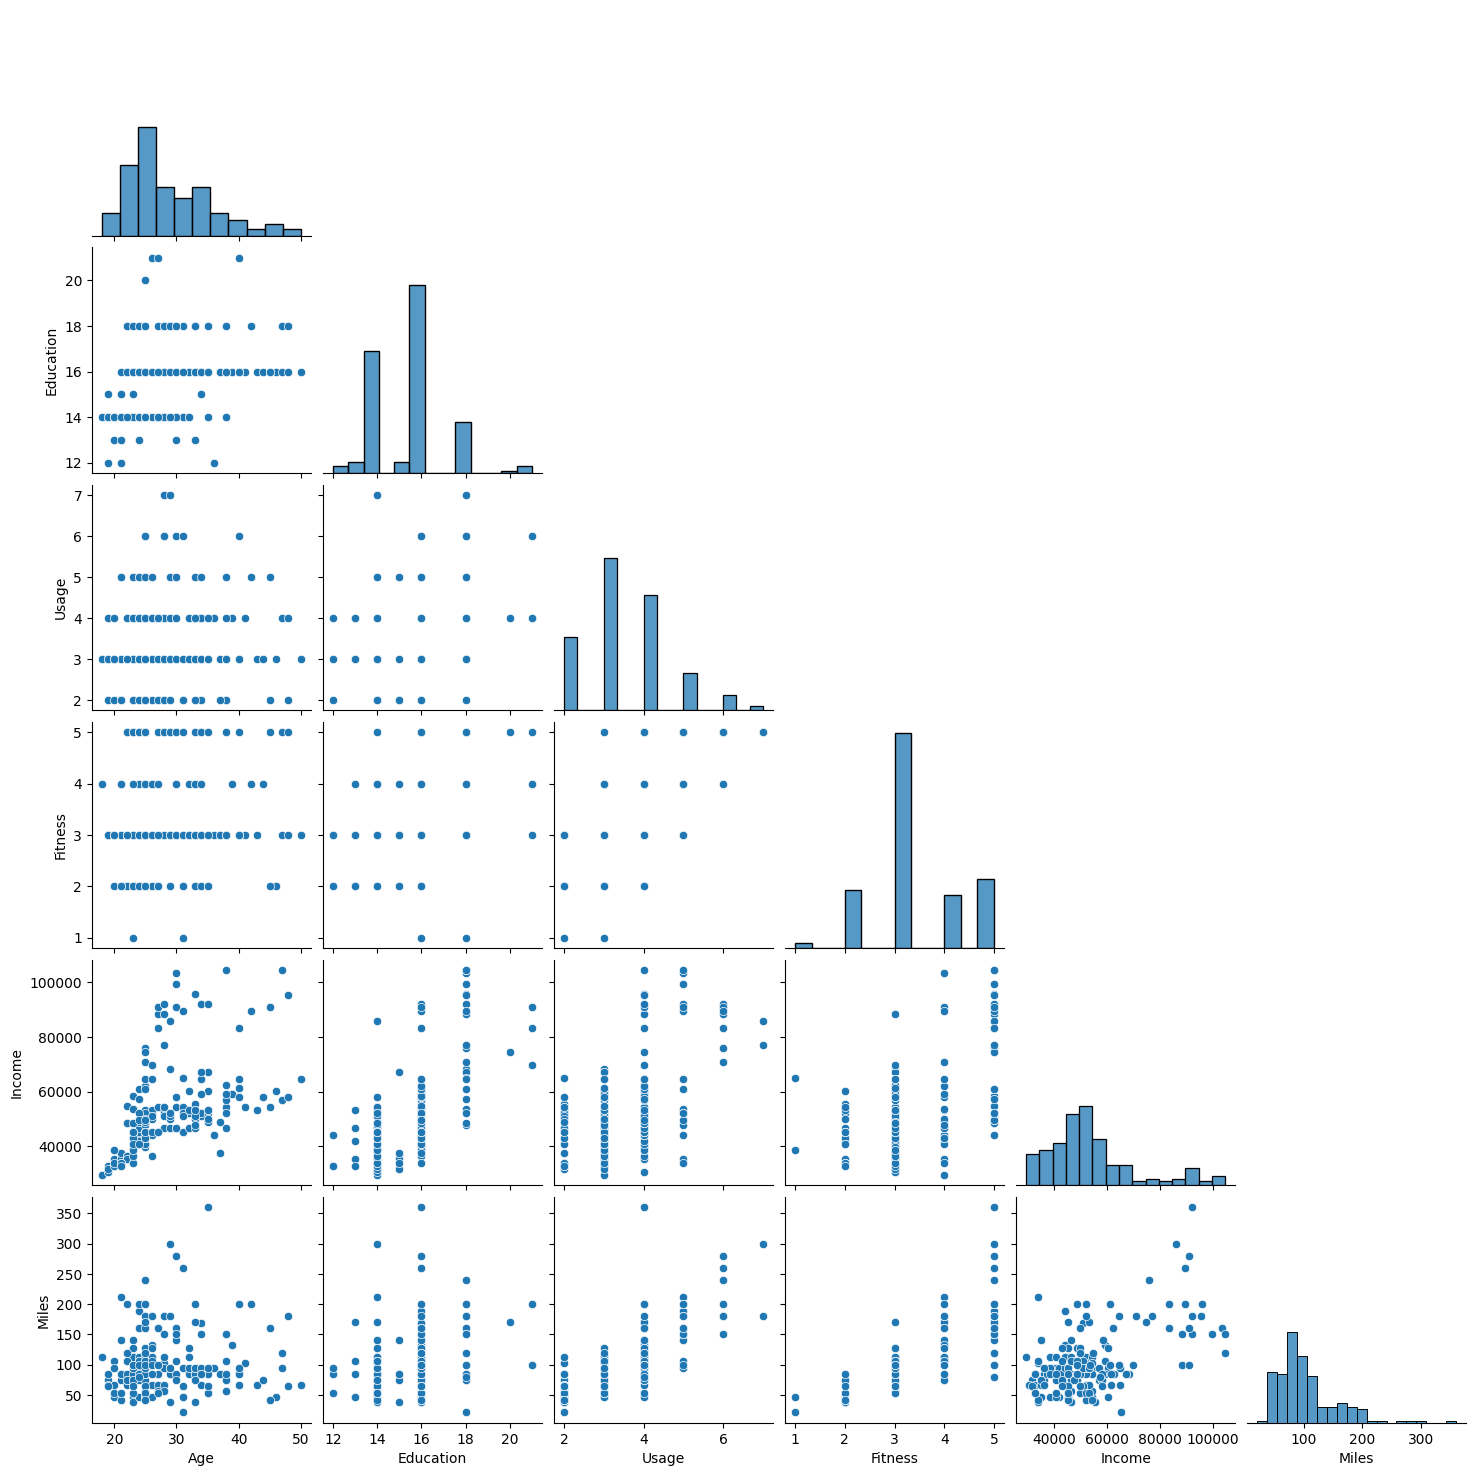

In [53]:
sns.pairplot(data=cardio_data, corner=True);

In [65]:
cardio_data[["Age", "Education", "Usage", "Fitness", "Income", "Miles"]].corr().round(2)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


<Axes: >

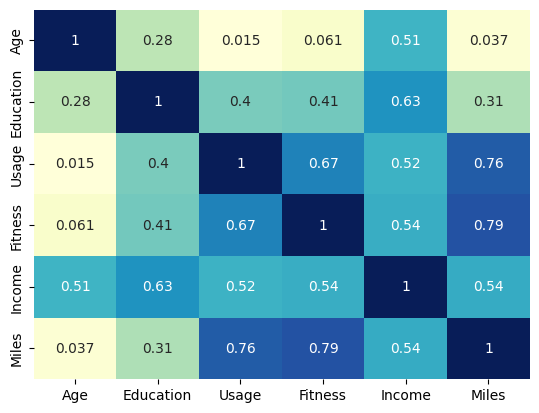

In [61]:
sns.heatmap(cardio_data[["Age", "Education", "Usage", "Fitness", "Income", "Miles"]].corr(), annot=True, cmap="YlGnBu", cbar=False)